# Seaborn

## Overview

- *Matplotlib* is the foundational plotting library in Python and underpins much of the ecosystem. As a low-level, general-purpose tool, it offers fine control but can feel verbose for everyday statistical graphics. 

- *Seaborn* builds on Matplotlib with modern style and color defaults, concise high-level plotting functions, and tight *Pandas* integration. In practice, you can produce attractive, *label-aware* figures with much less code while still have access to Matplotlib for fine control. Everything we do could be replicated with raw Matplotlib. Seaborn simply wraps those calls under the hood, but its higher-level API makes the workflow far more convenient.

- Seaborn also includes quick routines for *statistical* exploration: 
  - *distributions*, 
  - *relationships*, and 
  - *categorical* patterns, and 
  - basic model-fitting and diagnostic plots.

- Seaborn has several built-in datasets that are commonly used for learning about data science and machine learning; e.g., iris, titanic, tips, penguin...

By convention, Seaborn is often imported as `sns`:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns

## Figure vs. Axes

There are two ways to classify the seaborn visualization functions: 
- By *level*: figure-level vs. axes-level
- By *module*: relational, distributional, and categorical are the three major modules.
  
When classify seaborn plotting functions by the levels of figure and axes, we see that: 
- **Figure-level** functions: Build an entire figure (and grid of subplots). Great for faceting by rows/columns and consistent styling/layout.
- **Axes-level** functions: Draw one plot on a given Matplotlib axes. Great for composing multiple plots in a custom figure.

When you use figure-level functions such as `relplot()`, `displot()`, or `catplot` to create plots, you are creating **figures**; whereas when you use axes-level functions, you are creating axes.

<!-- <figure>
    <img src="../../images/sns_plot_chart.png" alt="Seaborn Plots Chart" width=400 >
    <figcaption><a src="https://seaborn.pydata.org/tutorial/function_overview.html">Seaborn Plots Chart</a></figcaption>
<figure> -->
```{figure} ../../images/sns_plot_chart.png 
:name: sns_plot_chart
:width: 375
:align: center
:alt: Seaborn Plots Chart
Seaborn Plots [Chart](https://seaborn.pydata.org/tutorial/function_overview.html)
``` 

The table below shows the axes-level functions included in each module/figure-level function and their purposes. Note that `displot`, `catplot`, and `relplot` are general wrappers (figure-level APIs) that pick an axes-level plot via the `kind=` parameter. `lmplot`, `pairplot`, and `jointplot`, on the other hand, are specialized figure-level tools that build purpose-made grids.

| Figure-level Function | Axes-level Function(s)    | Purpose  |
| --------------------- | ------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------ |
| `displot()` | `histplot()`, `kdeplot()`, `ecdfplot()`  | Distribution plots (histogram, KDE, ECDF)   |
| `relplot()` | `scatterplot()`, `lineplot()`  | Relationship plots (scatter, line)     |
| `catplot()` | `stripplot()`, `swarmplot()`, `boxplot()`, `violinplot()`, `boxenplot()`, `barplot()`, `countplot()`, `pointplot()` | Categorical plots (various types by kind)   |
| `lmplot()`  | `regplot()`     | figure-level wrapper of `regplot` w/ faceting    |
| `pairplot()`     | `scatterplot()`, `kdeplot()`, `histplot()`    | Pairwise relationships across variables     |
| `jointplot()`    | `scatterplot()`, `kdeplot()`, `histplot()`, `regplot()`, `residplot()`, `kind="hex"` *(Matplotlib hexbin)* | Bivariate plots with marginals and/or regression |



The major figure-level functions are the three modules: displot, catplot, and relplot; each includes axes-level functions and with different return values, faceting, and sizing approaches. 

| Aspect     | Figure-level | Axes-level    |
| --------------- | ------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------- |
| Common funcs    | `displot`, `catplot`, `relplot`, `lmplot`, `pairplot`, `jointplot` | `histplot`, `kdeplot`, `scatterplot`, `lineplot`, `barplot`, `countplot`, `regplot`, `heatmap`, … |
| Return value    | `FacetGrid` (or `JointGrid` for `jointplot` and `PairGrid` for `pairplot`)    | `Axes`  |
| Faceting   | Built-in: `row=`, `col=`, `col_wrap=`     | You manage subplots yourself     |
| Sizing     | `height=` (in), `aspect=` (width/height)  | Use Matplotlib: `plt.subplots(figsize=(w,h))` or `ax.figure.set_size_inches`  |
| Multiple panels | Automatic grid from data   | Use **loops** or multiple **calls** with different **`ax=`**     |
| When to use     | Quick small-multiples, consistent layout across facets   | Custom layouts, overlaying plots, fine control of a single axes     |

### Module vs Function
All the seaborn visualization functions are accessible at the top level of the seaborn namespace, so they are accessed directly by calling `sns.FUNCTION()`. Most of these visualization functions, however, can be categorized into three `modules` with one single **figure-level** function each: 

- **distributional**: `displot()`
- **categorical**: `catplot()`
- **relatoinal**: `relplot()`

Functions in the same module share underlying code and features. For example, `histplot` and `kdeplot` both have `multiple="stack"` and they are in the distributional module:

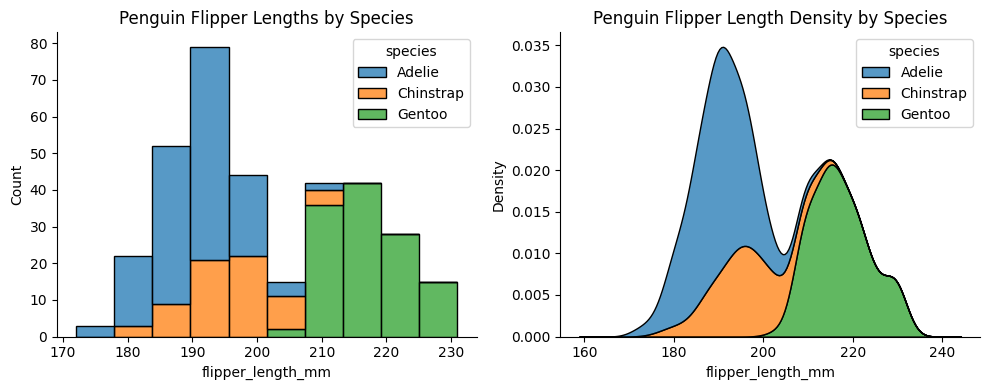

In [ ]:
penguins = sns.load_dataset("penguins")       ### load example dataset

fig, ax = plt.subplots(1, 2, figsize=(10, 4)) ### create a figure with 2 subplots

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=ax[0])
ax[0].set_title("Penguin Flipper Lengths by Species")

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=ax[1])
ax[1].set_title("Penguin Flipper Length Density by Species")

sns.despine()          ### remove top and right spines for a cleaner look
plt.tight_layout()     ### adjust subplot parameters for a nicer fit
# plt.show()

## Distribution Plots

The distplot shows the distribution of a univariate set of observations. Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. We have seen that this is relatively straightforward in Matplotlib. 

### Histogram

In [6]:
# ### multivariate_normal: the mean and covariance matrix for a 2-dimensional distribution

# mean=[0, 0]
# cov = [[1, 0.5], [0.5, 2]]

# np.random.seed(42)   ### fix the random numbers

# sample1 = np.random.multivariate_normal(mean, cov)
# sample2 = np.random.multivariate_normal(mean, cov, size=3)
# sample3 = np.random.multivariate_normal(mean, cov, size = (3, 2))

# print(f"Single sample:\n {sample1}\n")
# print(f"3 samples:\n {sample2}\n")
# print(f"3x2 samples:\n {sample3}")

In [7]:
### generates 2,000 random samples from a 2-dimensional (bivariate) 
### normal distribution with the following properties:
### [0, 0]:	mean vector, the “center” of the distribution
### [[5, 2], [2, 2]]: covariance matrix, the spread and relationship between the two variables

### the distributions center at the origin (0, 0).
### variable 1 (x-axis) has a variance of 5, so it’s more spread out.
### variable 2 (y-axis) has a variance of 2, so it’s narrower.
### covariance of 2 means the two variables have a moderate positive correlation (≈ 0.63).
### points will form an elliptical cloud tilted upward to the right.
### cov(X, Y)/sqr(var(X) x var(Y)) = 2/sqr(5x2) = 2/sqr(10) ~= .63

# np.random.seed(42)   ### fix the random numbers
# data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)  ### mean, covariance, number
# data = pd.DataFrame(data=data, columns=['x', 'y'])
# data.head()

Comparing with Pandas, matplotlib, and seaborn using the following code, we see that 
- They have different syntax and are visually presented differently.  
- They all take the dataframe numerical columns and plot them together.

Text(0.5, 1.0, 'Seaborn histplot()')

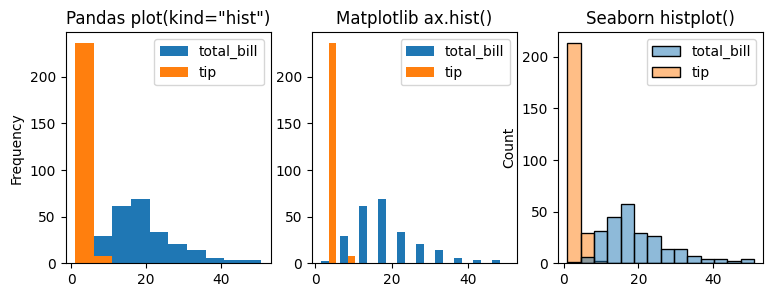

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))

data=tips[['total_bill', 'tip']]

data.plot(ax=ax[0], kind='hist', title=f'Pandas plot(kind="hist")')   ### Pandas histogram (data first)

ax[1].hist(data, label=['total_bill', 'tip']) ### Matplotlib histogram (axes first)
ax[1].set_title(f'Matplotlib ax.hist()')
ax[1].legend() 

sns.histplot(data=data, ax=ax[2])  ### Seaborn histogram (seaborn first)
ax[2].set_title(f'Seaborn histplot()')

Now let's take a look at how histogram works:

<Axes: xlabel='total_bill', ylabel='Count'>

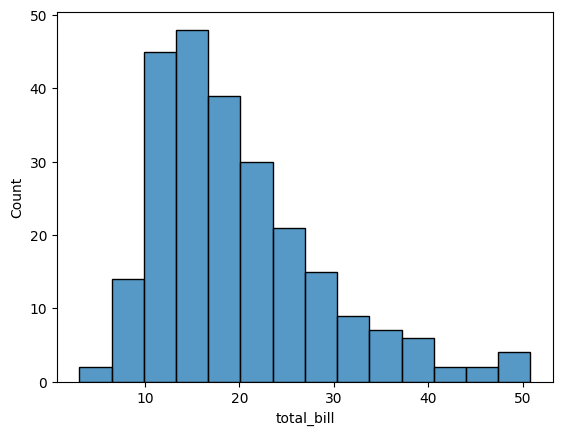

In [9]:
sns.histplot(tips['total_bill'])

To control the size of the plot, use `figsize` in Matplotlib's `plt.subplots`:

```
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(5, 3))  ### width: 5, height: 3
sns.histplot(tips['total_bill'], bins=30, ax=axes)  ### specify ax=axes to plot on the given axes
```

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(5, 3))  ### width: 5, height: 3
sns.histplot(tips['total_bill'], bins=30, ax=axes)  ### specify ax=axes to plot on the given axes

<Axes: xlabel='total_bill', ylabel='Count'>

Now let's plot `total_bill` and `tip` distributions separately using `histplot` with the following code. Let us start with `sns.histplot()` to plot the histograms with seaborn.

In [11]:
# tips.loc[:, ['total_bill', 'tip']]

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

for i, col in enumerate(tips.loc[:, ['total_bill', 'tip']]):
    sns.histplot(data=tips[col], ax=axes[i])
    axes[i].set_title(f'{col} w/ sns.histplot()')

# plt.tight_layout()

### `pd`, `plt`, `sns`, and `bins`

Now, let's further compare the **Pandas**, **Matplotlib**, and **Seaborn** histogram plots. We manipulate the number of `bins` in this plotting to see the difference in presentation.

In [13]:
### Now using Pandas plotting to create histograms for total_bill and tip with different bin sizes.

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
bins = [30, 10]   ### different bin sizes for each column

for i, col in enumerate(data.columns):
    data[col].plot(kind='hist', bins=bins[i], label=col, ax=axes[i], title=f'{col} w/ df.plot()')
    axes[i].legend()
# plt.tight_layout()

In [14]:
### Now using Matplotlib to create histograms for total_bill and tip with different bin sizes.
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
bins = [30, 10]   ### different bin sizes for each column

for i, col in enumerate(data.columns):
    fig.axes[i].hist(data[col], bins=bins[i], label=col)
    fig.axes[i].set_title(f'{col} w/ plt.ax.hist()')
    fig.axes[i].legend()
# plt.tight_layout()

In [15]:
### Now using Seaborn to create histograms for total_bill and tip with different bin sizes.
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
bins = [30, 10]   ### different bin sizes for each column

for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=bins[i], label=col, ax=axes[i])
    axes[i].set_title(f'{col} w/ sns.histplot()')
    axes[i].legend()

# plt.tight_layout()

### `alpha`
With the same code, we are plotting `x` and `y` columns using `sns.histplot` and add `alpha=0.5` to change the translucence of the plots.

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for i, col in enumerate(data.columns[:2]) :
    sns.histplot(data[col], alpha=0.25, bins=30, ax=axes[i])  ### seaborn
# plt.tight_layout()

### `kde`
We can also add `kde=True` to show the KDE plot with the histogram.

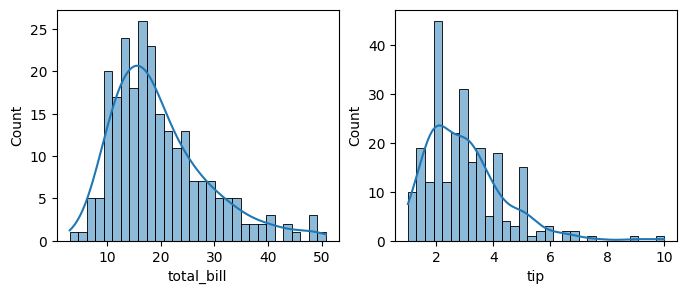

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], alpha=0.5, bins=30, kde=True, ax=axes[i])     ### seaborn

Histograms are useful, but sometimes we want a smoother representation of our data's distribution. We can achieve this using kernel density estimation (KDE), which creates a continuous curve instead of bins. In Seaborn, use `sns.kdeplot()` to create a KDE plot.

### KDE/Density Plot

A density plot is any chart showing an estimate of a distribution (probability density), while a KDE plot is one specific kind of density plot that uses a Kernel Density Estimate (a smooth, nonparametric estimator).

Text(0.5, 1.0, 'KDE w/ Fill')

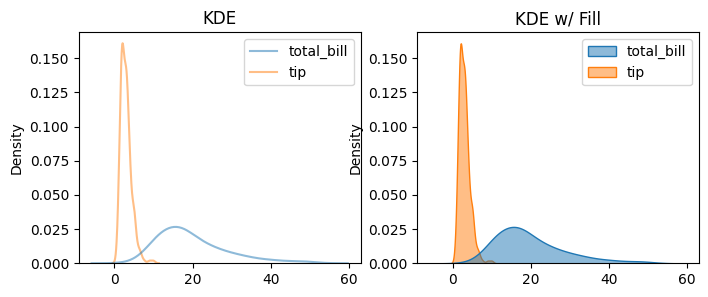

In [40]:
### by default, line plot
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.kdeplot(data=data, alpha=0.5, ax=axes[0])
axes[0].set_title('KDE')
sns.kdeplot(data=data, fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('KDE w/ Fill')

If we pass x and y columns to kdeplot, we instead get a two-dimensional visualization
of the joint density, which is a smoothed out version of the scatter plot:

In [19]:
### kde plot with x and y
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.kdeplot(data=data, x='total_bill', y='tip', ax=axes[0])  ### density plot
sns.scatterplot(data=data, x='total_bill', y='tip', ax=axes[1])   ### scatter plot

# plt.tight_layout()

<Axes: xlabel='total_bill', ylabel='tip'>

### rugplot

`rugplot` draws a dash mark for every point on a univariate distribution, which are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

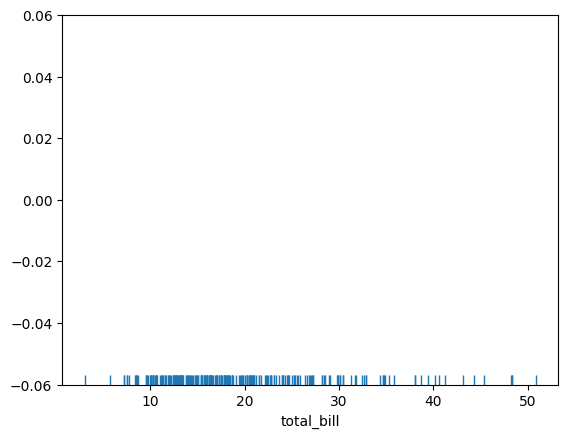

In [20]:
sns.rugplot(tips['total_bill'])

In [21]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

(0.0, 1.0)

In [22]:
### To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
import numpy as np
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

Text(0.5, 0.98, 'Sum of the Basis Functions')

So with our tips dataset:

<Axes: xlabel='total_bill', ylabel='Density'>

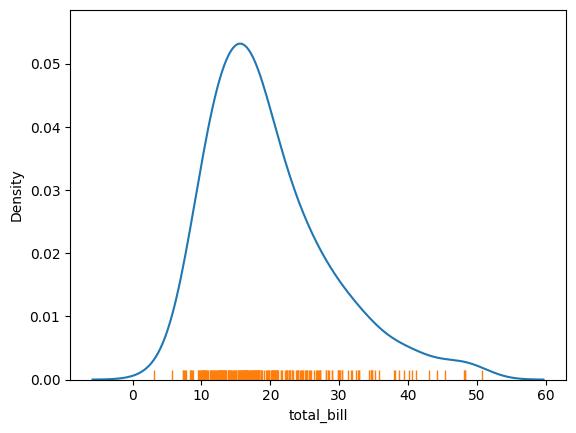

In [23]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

In [24]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

<Axes: xlabel='tip', ylabel='Density'>

While we are looking at distributions, let's try to plot a scatter plot.

## Relational Plots

### Scatter Plot

<Axes: xlabel='total_bill', ylabel='tip'>

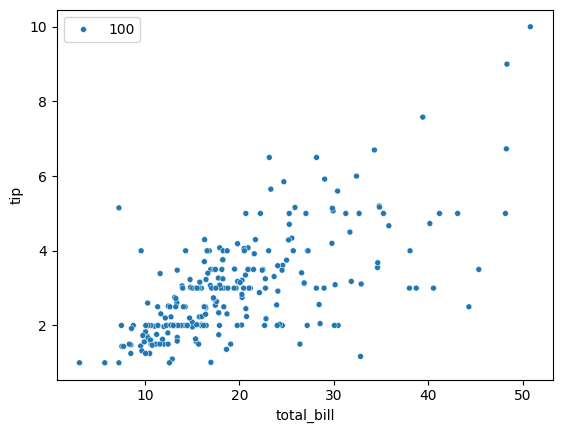

In [25]:
### use: https://seaborn.pydata.org/ to figure this out

sns.scatterplot(x='total_bill', y='tip', data=tips, size=100, legend=True)

### Line Plot

In [26]:
sns.lineplot(x='day', y='tip', data=tips)

<Axes: xlabel='day', ylabel='tip'>

## Categorical Plots

`sns.catplot()` is a wrapper for several plot types. `catplot()` can create different kinds of categorical plots using the kind argument:

| kind  | Description     | Example use   |
| ---------- | ---------------------------------------- | --------------------------------- |
| `"strip"`  | scatter points for each category    | show raw data distribution   |
| `"swarm"`  | scatter points adjusted to avoid overlap | show each observation clearly     |
| `"box"`    | **box plot**    | show **median, quartiles, outliers**  |
| `"violin"` | smoothed version of box plot   | show full data distribution shape |
| `"boxen"`  | enhanced box plot for large datasets     | detailed distribution   |
| `"point"`  | shows mean and confidence interval  | highlight summary trends     |
| `"bar"`    | **bar heights** = **mean** value per category    | **compare averages**   |
| `"count"`  | bar chart of counts per category    | visualize frequency     |


Categorical plots provide another way to visualize these relationships. With categorical plots, you can see how values of one variable (like total bill amount) are distributed within categories of another variable (like day of the week), as shown in:

#### Box Plot

| Element     | Meaning     |
| -------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Box**     | The middle 50% of the data (from 25th to 75th percentile, or Q1 to Q3): the *interquartile range (IQR = Q3-Q1)* |
| **Line inside box**   | The **median** (50th percentile)     |
| **Whiskers**     | Extend from the box to show data within 1.5 × IQR of Q1 and Q3     |
| **Points beyond whiskers** | These are **outliers** — values that fall far outside the main range (Q1-1.5IQR, Q3 + 1.5IQR)    |


In [27]:
### with sns.axes_style(style='ticks'):
### means temporarily changes the plot’s visual style inside the with block
### sns.axes_style() controls background elements like gridlines, ticks, and axis spines.
### "ticks" is a style

with sns.axes_style(style='ticks'):     ### use 'ticks' style in this with block
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

#### Bar Plot with `bar`

- Bar plots are categorical, unlike histograms, which are numerical.

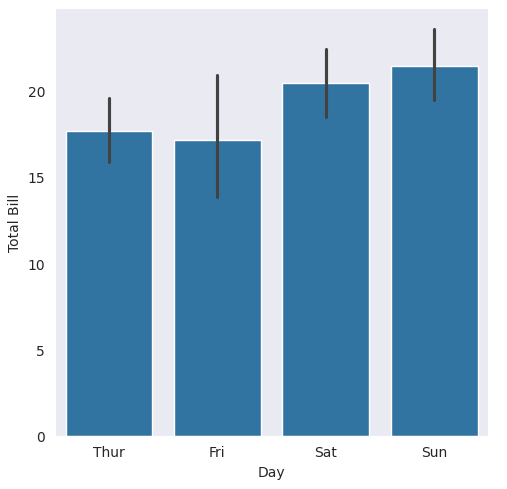

In [28]:
### black vertical lines are confidence intervals (95% by default)
### remember that data = sns.load_dataset('tips')

with sns.axes_style(style='dark'):     
    g = sns.catplot(x="day", y="total_bill", data=tips, kind="bar")
    g.set_axis_labels("Day", "Total Bill")

Now, let's add `hue` and observe the difference. You will see that we have categorical distribution information and a legend from data dataframe labels.

In [29]:
with sns.axes_style(style='dark'):     
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="bar")
    g.set_axis_labels("Day", "Total Bill")

### Bar Plot `count`

- Note that this is a bar plot, not a histogram, because bar plots are categorical and histograms are numerical.
- We are using `catplot()` here for this bar plot.
- Also note that we use `kind=count` in this example. 

| Function    | Typical Use | Input Type     | Output Plot  |
| ------------------------------- | ----------------------------------------- | ------------------------ | ----------------------------------------------- |
| **`sns.catplot(kind='count')`** | Counts *categories* (qualitative data)    | **Categorical**     | Bar plot showing count of each category    |
| **`sns.histplot()`**  | Bins *numerical data* (quantitative data) | **Continuous / numeric** | Histogram showing frequency across numeric bins |

Let's load the `planets` dataset first to plot the bar plot:

In [30]:
with sns.axes_style('white'):
    g = sns.catplot(
   x='year',
   data=planets,
   aspect=2,
   kind='count',
   color='steelblue',
   height=3
    )
    g.set_xticklabels(step=5)
    

## Pair Plots

Pair plots extend the idea of joint plots by visualizing relationships among all pairs of variables in a dataset simultaneously. Rather than creating multiple plots individually, a pair plot automatically generates an entire grid of subplots—making it ideal for exploring multidimensional numerical data.

Seaborn’s pairplot() function creates this grid by drawing scatterplots for every pair of numerical variables (off-diagonal) and one-dimensional distributions along the diagonals. This layout allows quick identification of trends, clusters, and potential outliers across several features at once.

The hue parameter adds a categorical dimension to the visualization. By assigning colors according to a categorical variable, hue= enables straightforward comparison between groups within the same plot.

In the following example, we’ll use the well-known Iris dataset, which includes measurements of petal length, petal width, sepal length, and sepal width for three different species of iris flowers.

Note that we are visualizing all the relationships between variables, simply use **`sns.pairplot()`**:


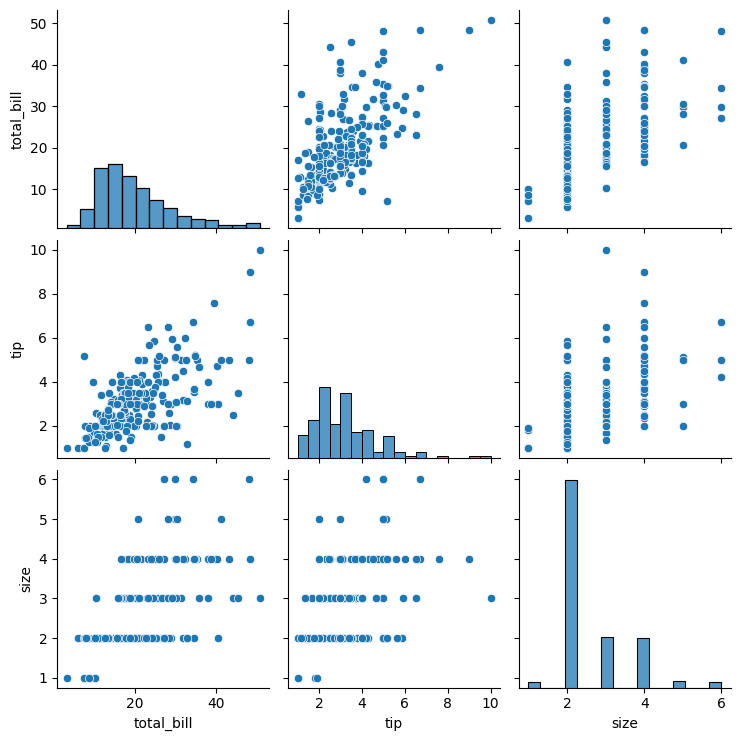

In [31]:
sns.pairplot(tips)

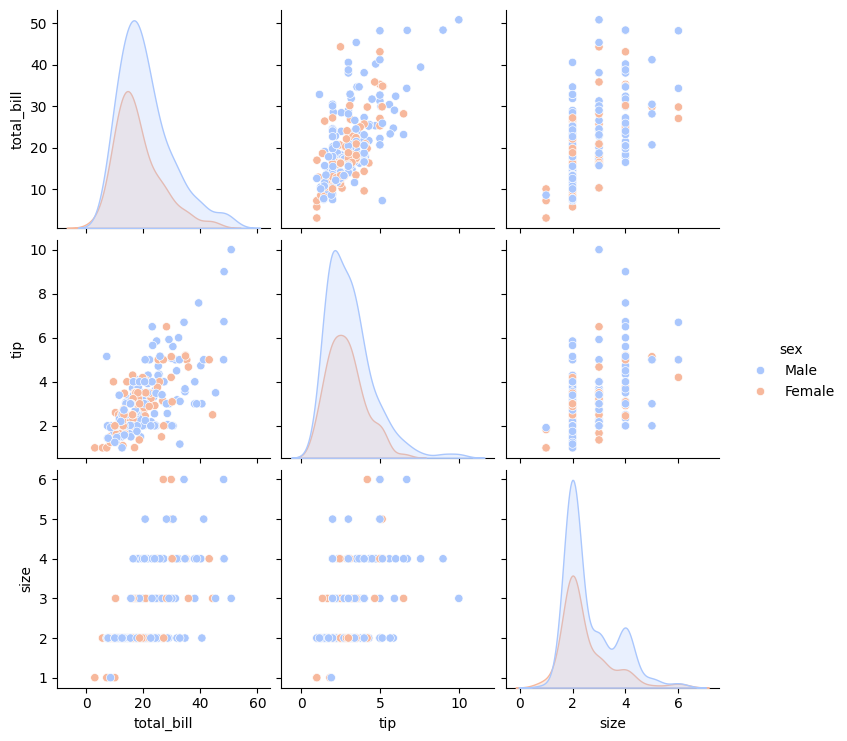

In [32]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

Pairplot using the `iris` dataset.

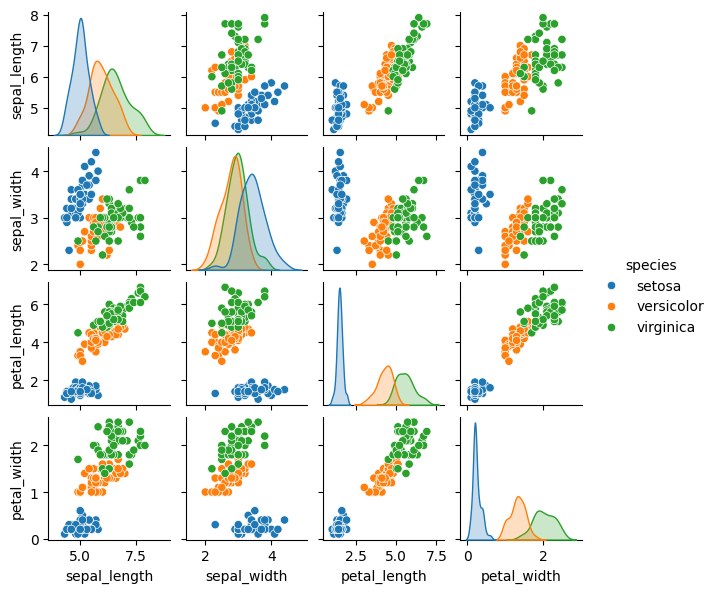

In [33]:
sns.pairplot(iris, hue='species', height=1.5)
# plt.tight_layout()

## Joint Plots

Like the pair plots we saw earlier, **sns.jointplot()** visualizes the relationship between two variables. However, instead of showing all pairwise relationships, a joint plot focuses on a single pair, displaying both how the variables relate to each other (in the center) and how each variable is distributed individually (along the edges). 

Beyond scatter plots, joint plots can automatically overlay kernel density estimates (to show smooth distributions) and **regression lines** (to highlight trends), which are pretty cool.

Note that we are using the `tips` dataset here.

### Scatter

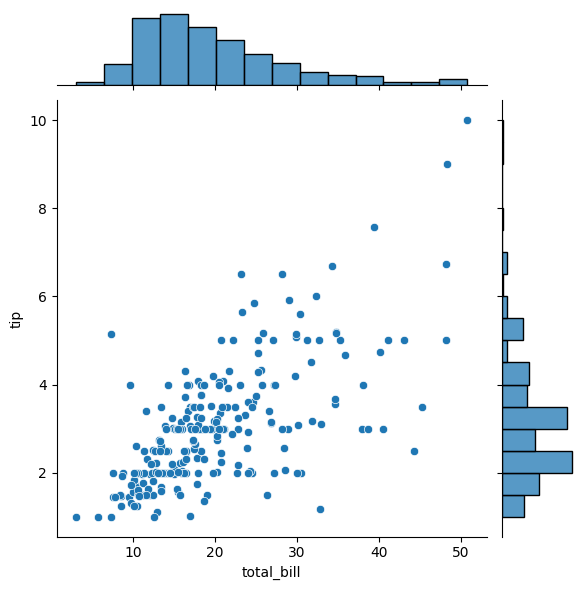

In [34]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

### Hexbin

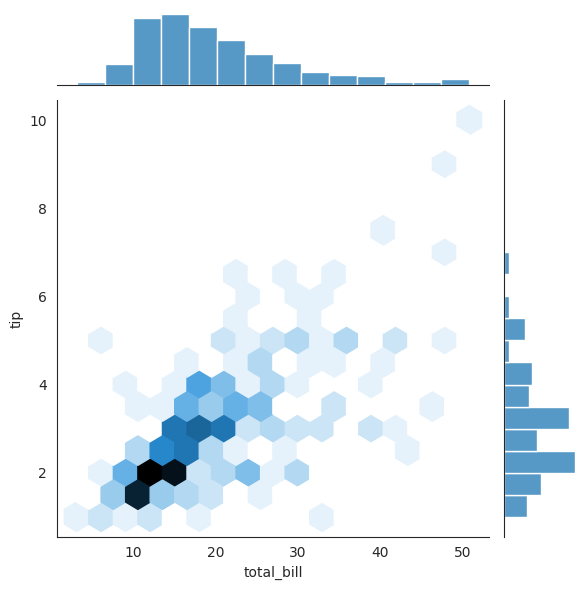

In [35]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')   ### try different kind

### Regression
Regression jointplots are specifically designed to display the relationship between two continuous variables, while also showing their marginal distributions on the axes.

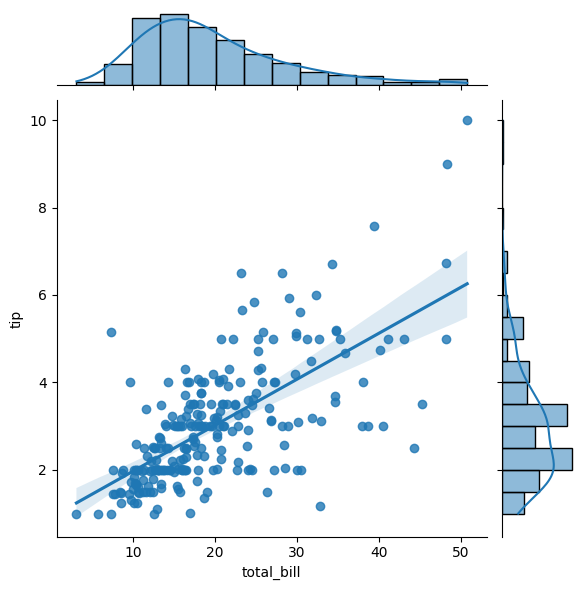

In [36]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

## Faceted Histograms

When comparing multiple groups, side-by-side histograms can reveal patterns that might be hidden in a single plot. Seaborn's FacetGrid allows us to create these comparison plots effortlessly. Let's use a restaurant tipping dataset to see how tip amounts vary across different categories:

In [37]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']   ### create a new column

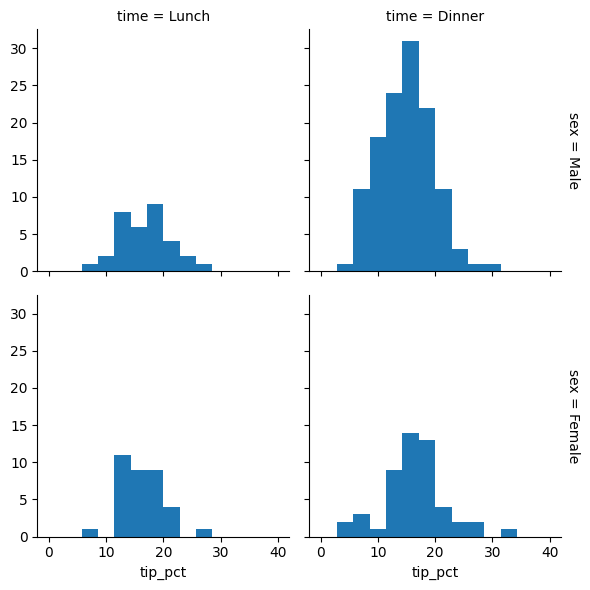

In [38]:
grid = sns.FacetGrid(data=tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))   ### apply .hist to column "tip_pct"